In [21]:
import faiss
import numpy as np
import json
import pickle
import numpy as np
from pathlib import Path
from IPython.display import Image, display

from elasticsearch import Elasticsearch, exceptions

In [22]:
indexer_dir = Path('/nfs/data/iart/web/models/web/faiss_all_210223/')
media_dir = Path('/home/springsteinm/media/')
a = open(indexer_dir/'data.pkl', 'rb')

In [23]:
d = pickle.load(a)

In [24]:
for emb_name, emb in d.items():
    print(emb_name)
    print(emb.keys())                
    print(f"FaissIndexer: Restore index {emb_name}")
    index_path =  indexer_dir/ (emb["id"] + ".index")
    print(index_path)
    d[emb_name]["index"] = faiss.read_index(str(index_path))

clip_embedding_feature.clip_embedding
dict_keys(['entries', 'rev_entries', 'd', 'id'])
FaissIndexer: Restore index clip_embedding_feature.clip_embedding
/nfs/data/iart/web/models/web/faiss_all_210223/ee689343fd5747a2a0189f36fac5516e.index
byol_embedding_feature.byol_embedding
dict_keys(['entries', 'rev_entries', 'd', 'id'])
FaissIndexer: Restore index byol_embedding_feature.byol_embedding
/nfs/data/iart/web/models/web/faiss_all_210223/ab2aa3f12aa2432dbf47a5c86c123b91.index
image_net_inception_feature.imagenet_embedding
dict_keys(['entries', 'rev_entries', 'd', 'id'])
FaissIndexer: Restore index image_net_inception_feature.imagenet_embedding
/nfs/data/iart/web/models/web/faiss_all_210223/365d406145e941ae9b51d1eeda36a610.index
yuv_histogram_feature.color
dict_keys(['entries', 'rev_entries', 'd', 'id'])
FaissIndexer: Restore index yuv_histogram_feature.color
/nfs/data/iart/web/models/web/faiss_all_210223/7b1248a9998b47509ca2d0061986a1d3.index


In [41]:
#d['byol_embedding_feature.byol_embedding']['entries']
# source_id = '5df5d546d5a230d289443939c9d8d384'
#source_id = 'b974d04e00923786bf161336c1072672'
source_id = '06378229f7843f0ea5a4b338adca0d87'
# embedding = 'image_net_inception_feature'
# embedding_ser = 'imagenet_embedding'
# embedding = 'byol_embedding_feature'
# embedding_ser = 'byol_embedding'
# embedding = 'yuv_histogram_feature'
# embedding_ser = 'color'
embedding = 'clip_embedding_feature'
embedding_ser = 'clip_embedding'

In [42]:
es = Elasticsearch([{"host": 'localhost', "port": 9200}], timeout=30)
def get_feature(id):
    entry = es.get(index='iart_all',id=id)['_source']
    # print(entry)
    feature = None
    for f in entry['feature']:
        if f['plugin'] == embedding:
            for a in f['annotations']:
                if a['type'] == embedding_ser:
                    feature = a['value']
                    
    return feature

feature = get_feature(id = source_id)                    


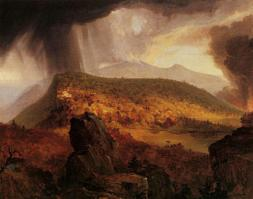

In [43]:
def id_to_path(id):
    return media_dir / id[0:2] /id[2:4]/ f"{id}_m.jpg"

display(Image(filename=id_to_path(source_id)))

# for x in list(d['byol_embedding_feature.byol_embedding']['entries'])[100000:100010]:
#     display(Image(filename=id_to_path(x)))

{'l2': 0.0, 'l2_inv': 1.0, 'faiss': 0.0, 'id': '06378229f7843f0ea5a4b338adca0d87', 'cos': 0.9999999999999999}


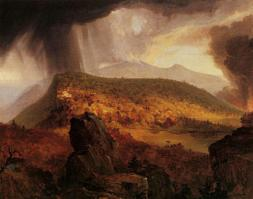

{'l2': 4.5199463112646185, 'l2_inv': 0.18116118230340184, 'faiss': 20.429922, 'id': 'cc6cdcedb8203b19ad9982d60e277194', 'cos': 0.8966666519261987}


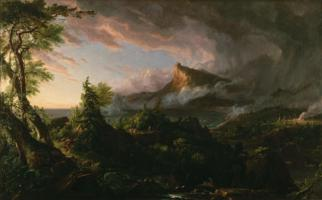

{'l2': 4.833358820798469, 'l2_inv': 0.17142782241246052, 'faiss': 23.36135, 'id': 'a7757f3bf0a1309188d4279f817af345', 'cos': 0.8859235196510955}


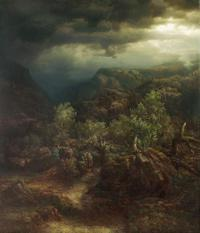

{'l2': 4.839095408260296, 'l2_inv': 0.17125940408258214, 'faiss': 23.416842, 'id': '9aeb2505d1f33fe689666eeae9e3160d', 'cos': 0.882932397519329}


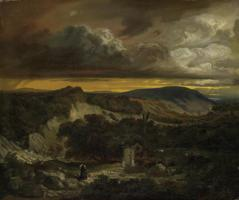

{'l2': 4.895912875378492, 'l2_inv': 0.16960901918616025, 'faiss': 23.96996, 'id': '3e9302af4c1d41efb1ab913e3d006a1e', 'cos': 0.8887267003108242}


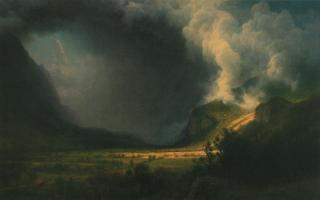

{'l2': 4.9477786474268575, 'l2_inv': 0.16812999596624573, 'faiss': 24.4805, 'id': 'e5b68a462fec3f36a14f49aa5d307f42', 'cos': 0.8822459722644252}


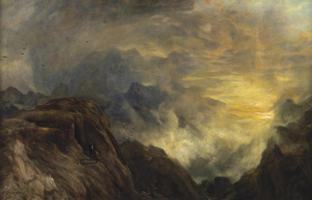

{'l2': 4.978923865150749, 'l2_inv': 0.16725417860372546, 'faiss': 24.789694, 'id': '19ef862fefed3d63b3900a4acaa6ef0b', 'cos': 0.8766568255991632}


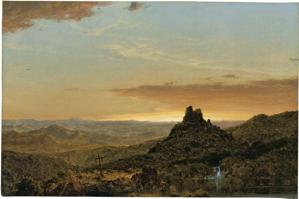

{'l2': 5.030229938089685, 'l2_inv': 0.16583115573811597, 'faiss': 25.303219, 'id': '1bbe99499f603d18b450a826555ef24e', 'cos': 0.869446839668547}


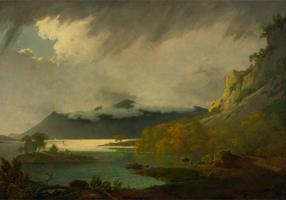

{'l2': 5.035175690114283, 'l2_inv': 0.16569525915177855, 'faiss': 25.353003, 'id': '3a7bb8a96b4c36228aed3c2e8c406a5e', 'cos': 0.8694699581315923}


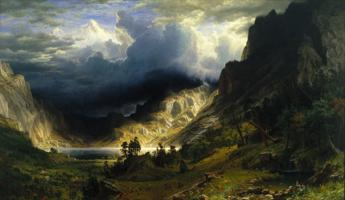

{'l2': 5.049588151501819, 'l2_inv': 0.1653005088869973, 'faiss': 25.498339, 'id': 'a1fcb8ab552c3795b3926cf653fdcc45', 'cos': 0.8718191825755163}


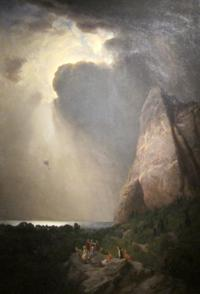

{'l2': 5.054334844951235, 'l2_inv': 0.16517091069614512, 'faiss': 25.546309, 'id': 'da6f6113457e3b3b8466957e7c18ba58', 'cos': 0.8757485472516296}


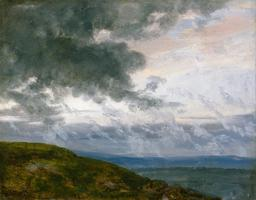

{'l2': 5.066656967918469, 'l2_inv': 0.16483542835670006, 'faiss': 25.671015, 'id': '58fa7ee8efea424a8e375079928e3cdf', 'cos': 0.8679061686754359}


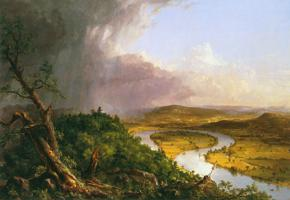

{'l2': 5.076521766372701, 'l2_inv': 0.16456782982889515, 'faiss': 25.77108, 'id': '110028a74d6536b4b07c955f89e2b578', 'cos': 0.8736883193740707}


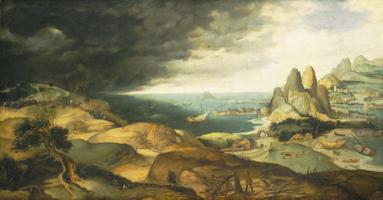

{'l2': 5.093449962885121, 'l2_inv': 0.16411064439536663, 'faiss': 25.94324, 'id': '630ab9dd2c163dd8b04cf4278026de02', 'cos': 0.871959643705772}


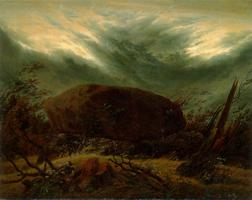

{'l2': 5.096655645397455, 'l2_inv': 0.16402435337723717, 'faiss': 25.975912, 'id': '5bcd3ad73b3e30cd84a9fb4a230194bd', 'cos': 0.8643281643155057}


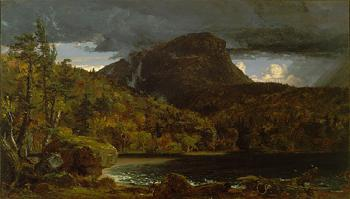

{'l2': 5.149954845758244, 'l2_inv': 0.1626028198710632, 'faiss': 26.522043, 'id': '0c6d435dc05e32dda6185f351cb30b46', 'cos': 0.8678530949004831}


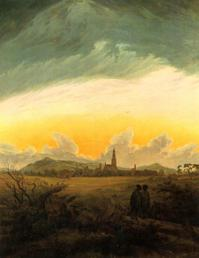

{'l2': 5.156826476351115, 'l2_inv': 0.16242133895458702, 'faiss': 26.592869, 'id': 'e1a2d3379b5033f09f1fbf69b22a3196', 'cos': 0.8654697006813559}


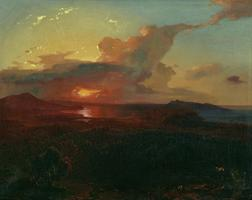

{'l2': 5.159926406975895, 'l2_inv': 0.16233960179581625, 'faiss': 26.624857, 'id': '64e3732c158534a18ad976c1aea02087', 'cos': 0.8638851937382175}


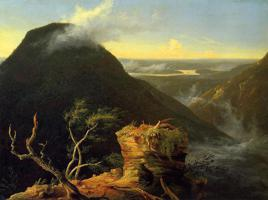

{'l2': 5.179446637671548, 'l2_inv': 0.16182678783950238, 'faiss': 26.826677, 'id': 'f9587f5c246e3a2dbb71fdb775e84afd', 'cos': 0.8656637652994614}


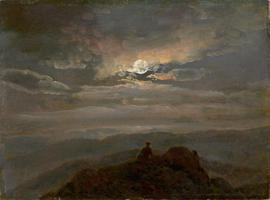

{'l2': 5.18094942702388, 'l2_inv': 0.16178744249675875, 'faiss': 26.842243, 'id': '1120426a0ebd3a49989487c12145f429', 'cos': 0.8672146756696495}


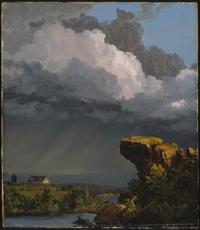

{'l2': 5.18954153272467, 'l2_inv': 0.16156285481128269, 'faiss': 26.931334, 'id': '56bed06e861736a7875a63afd92ca69b', 'cos': 0.8652369206722894}


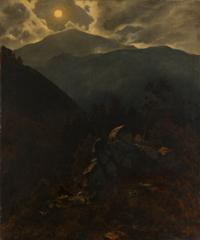

{'l2': 5.193117244593478, 'l2_inv': 0.161469573480623, 'faiss': 26.968473, 'id': 'e7759e766ae73ff9a837ef1ebce330c9', 'cos': 0.8622637831959794}


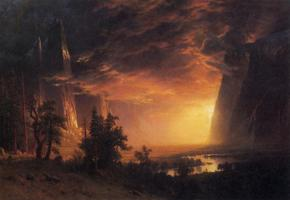

{'l2': 5.222719514696899, 'l2_inv': 0.16070144213284676, 'faiss': 27.27681, 'id': 'e4af6c422da734b980066ebe41ec4815', 'cos': 0.8599214611727957}


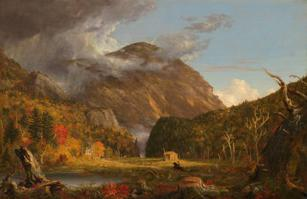

{'l2': 5.2336755076134605, 'l2_inv': 0.16041900140272883, 'faiss': 27.391367, 'id': '403ffbd8d46b4c73a6920475a3b47afa', 'cos': 0.8714506753890473}


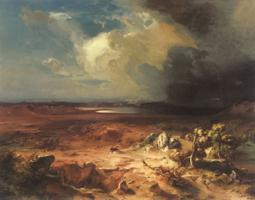

{'l2': 5.236130856034822, 'l2_inv': 0.16035583971626913, 'faiss': 27.417065, 'id': '77019360a89c34548d7e0ad2b8141135', 'cos': 0.8631023288333358}


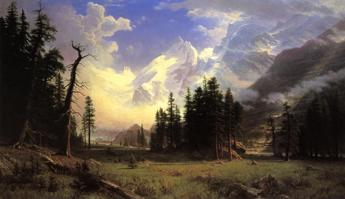

{'l2': 5.2474669672982595, 'l2_inv': 0.16006487192879928, 'faiss': 27.535908, 'id': 'f0efcdbb595f35b8819dfddde2d6b65a', 'cos': 0.8609317405978141}


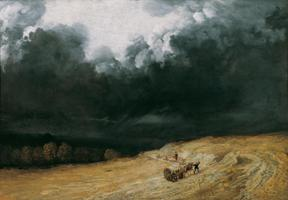

{'l2': 5.253785377281325, 'l2_inv': 0.15990315299798866, 'faiss': 27.602262, 'id': '47bf56e73a083b3db032f07cc13f3bf9', 'cos': 0.8638778533009435}


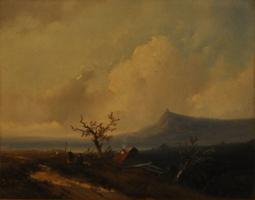

{'l2': 5.257573526792093, 'l2_inv': 0.15980635236940538, 'faiss': 27.642082, 'id': 'a59970f5aac839abaa600e032af56bda', 'cos': 0.8594689656277222}


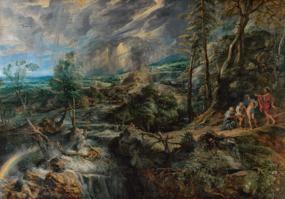

{'l2': 5.263020255906331, 'l2_inv': 0.159667374388092, 'faiss': 27.699377, 'id': 'f14bf10c78593c9a9bb6d36588a57750', 'cos': 0.8574298971183189}


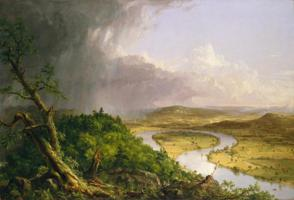

{'l2': 5.271822816417313, 'l2_inv': 0.15944327977224895, 'faiss': 27.79213, 'id': 'e745851b04b53d5188a516d504b7a73c', 'cos': 0.8658025798921721}


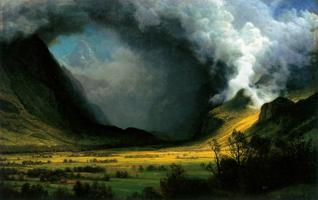

{'l2': 5.277206565029186, 'l2_inv': 0.15930653064232092, 'faiss': 27.84891, 'id': 'a33fcb2571a74b5da646403ac79fa213', 'cos': 0.8588894064892796}


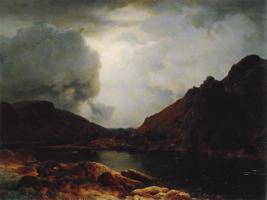

{'l2': 5.279759909410226, 'l2_inv': 0.15924175675912372, 'faiss': 27.875874, 'id': '93329160f17e3807b1e727bde03079e9', 'cos': 0.8591971074932505}


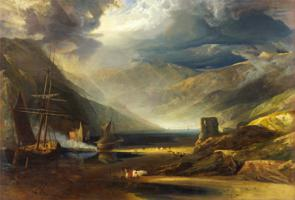

{'l2': 5.283611002171083, 'l2_inv': 0.15914416084230623, 'faiss': 27.916546, 'id': '136c2ced592d40dcabc94d0dedf6ad99', 'cos': 0.8599567921656062}


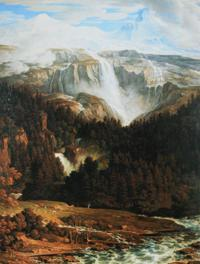

{'l2': 5.289495205523248, 'l2_inv': 0.15899527184977097, 'faiss': 27.978767, 'id': 'ee560ca1b99d484f996000b48c7db1f7', 'cos': 0.8724265019546994}


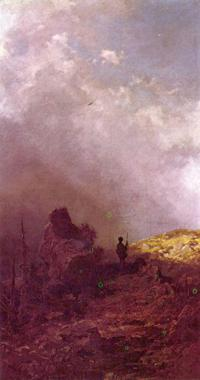

{'l2': 5.3217677206961715, 'l2_inv': 0.15818360372941337, 'faiss': 28.32121, 'id': 'b6d9a24c75fe304db382d7ba695beb23', 'cos': 0.8591818773169183}


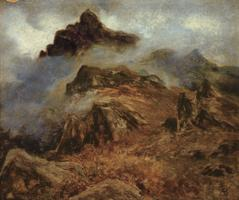

{'l2': 5.322967993697974, 'l2_inv': 0.15815357613650552, 'faiss': 28.334003, 'id': 'afed4aefe4a731d1890f7a0dc9b43643', 'cos': 0.8657243776819404}


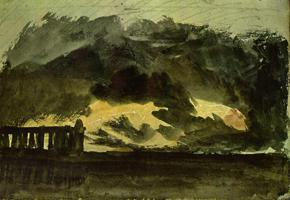

{'l2': 5.335386145830387, 'l2_inv': 0.15784357527412068, 'faiss': 28.466354, 'id': 'e09688d73eb237018e4c7ac63df7e258', 'cos': 0.8691246372319494}


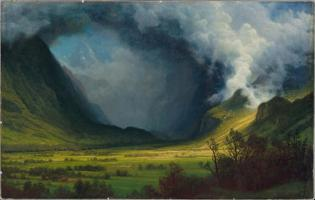

{'l2': 5.338421894652006, 'l2_inv': 0.15776797704863132, 'faiss': 28.498735, 'id': 'aace87f702cb319584b26127b46bbb91', 'cos': 0.8586291328296664}


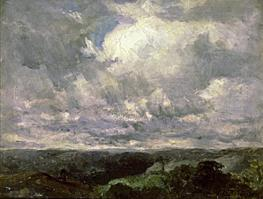

{'l2': 5.340955520081278, 'l2_inv': 0.15770493844864283, 'faiss': 28.525818, 'id': '13b6181fd23d38ac907b408f11d8e60a', 'cos': 0.8583265020194135}


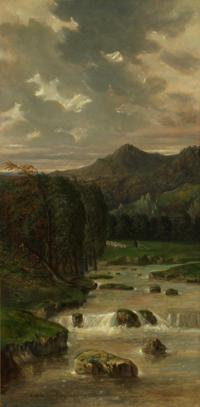

{'l2': 5.34488438309676, 'l2_inv': 0.15760728480160707, 'faiss': 28.56779, 'id': 'ce6b020036fc382387d9d65bd82a5966', 'cos': 0.8516486769925466}


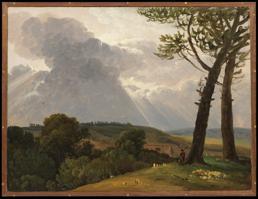

{'l2': 5.354557229997392, 'l2_inv': 0.1573673764836658, 'faiss': 28.671299, 'id': '7fe0412fce273505a262a0964e341b40', 'cos': 0.8642118084169099}


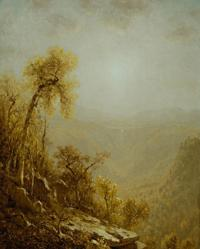

{'l2': 5.371391154695196, 'l2_inv': 0.15695159435676484, 'faiss': 28.85186, 'id': 'f605150fcc9a49f49dcafd838a981caf', 'cos': 0.8566219800109669}


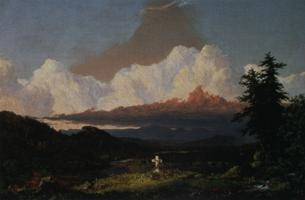

{'l2': 5.373801505121588, 'l2_inv': 0.1568922407132482, 'faiss': 28.87775, 'id': 'be23da2a4a5b3f0e96f51b7858980e32', 'cos': 0.8604701643709577}


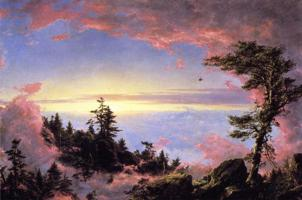

{'l2': 5.375013858580298, 'l2_inv': 0.15686240409565133, 'faiss': 28.890778, 'id': '4087954585d538c2806b13d7c5da9409', 'cos': 0.8544688956457697}


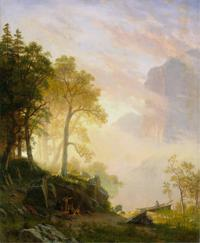

{'l2': 5.37543008475502, 'l2_inv': 0.15685216318052145, 'faiss': 28.89525, 'id': '07481f225adc3e86bb75a17afc07cfbe', 'cos': 0.8572243717554643}


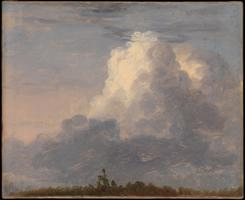

{'l2': 5.375778019898608, 'l2_inv': 0.1568436035381142, 'faiss': 28.898996, 'id': 'afc09c5b74353d8db72b22c131a72e85', 'cos': 0.8573853793094665}


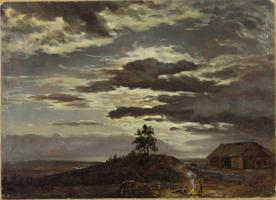

{'l2': 5.38022017741012, 'l2_inv': 0.1567344029192929, 'faiss': 28.946766, 'id': '3934cde8005e3997956f42ffa2026da7', 'cos': 0.8549347098568968}


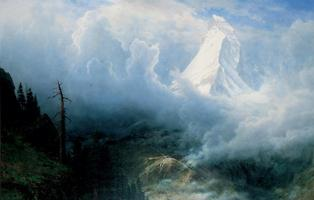

{'l2': 5.391499034181813, 'l2_inv': 0.15645781915196857, 'faiss': 29.068268, 'id': '2f6a9305f96f3c92bda6e34332c24d4d', 'cos': 0.8485897346284731}


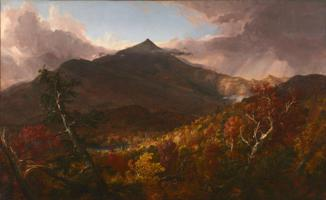

{'l2': 5.400203913508043, 'l2_inv': 0.15624502180148284, 'faiss': 29.162205, 'id': '2cd277bf6c7b3245b8e85b8a594aeb42', 'cos': 0.8589769311087767}


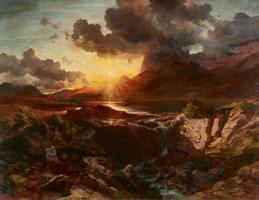

{'l2': 5.404651763814073, 'l2_inv': 0.15613651403343184, 'faiss': 29.210276, 'id': '6145cc1782eb3e7ca2a90b838cba4fe4', 'cos': 0.8503210560777085}


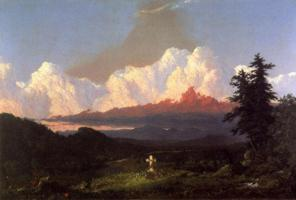

{'l2': 5.406176272404162, 'l2_inv': 0.1560993574759553, 'faiss': 29.22674, 'id': 'f5e3eddfe9f2314d9632a37c262a490b', 'cos': 0.85064897257595}


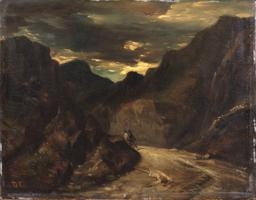

{'l2': 5.420256121067982, 'l2_inv': 0.15575702606606515, 'faiss': 29.379185, 'id': '6f1de66baa1c369db0bc14d37319c706', 'cos': 0.8523599574523871}


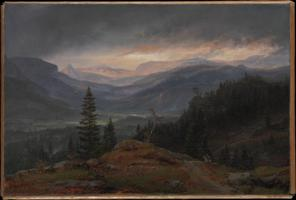

{'l2': 5.42255162704747, 'l2_inv': 0.15570135641863464, 'faiss': 29.404068, 'id': 'f04e235142fa3a3ca5901d705f57dbd3', 'cos': 0.852950072097104}


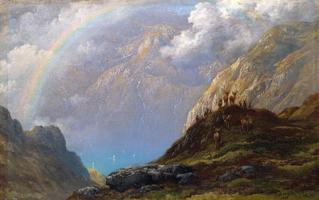

{'l2': 5.424365804136077, 'l2_inv': 0.15565738790219402, 'faiss': 29.423733, 'id': 'd0f0110f1c2d3e7c8c601d8f6a157753', 'cos': 0.844458450226875}


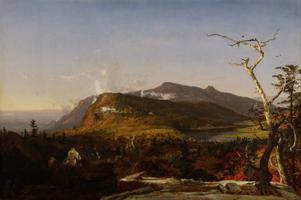

{'l2': 5.426606348455681, 'l2_inv': 0.15560312018182051, 'faiss': 29.448061, 'id': '3a8ff2e8c2ff416d831ba8fe37a568cd', 'cos': 0.862788721851036}


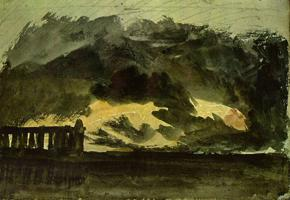

{'l2': 5.426646267944937, 'l2_inv': 0.15560215364393662, 'faiss': 29.448496, 'id': '1a90d2dc9d473971803cd07941c2a96b', 'cos': 0.8573708278581516}


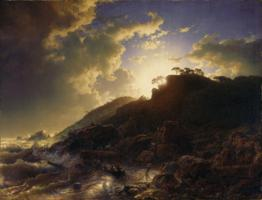

{'l2': 5.4329683706363365, 'l2_inv': 0.1554492331354463, 'faiss': 29.517147, 'id': '897d4430859d4c84b2953b32116bcc51', 'cos': 0.8477293211368356}


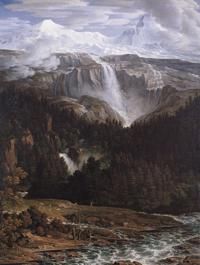

{'l2': 5.442318850709797, 'l2_inv': 0.15522361174188432, 'faiss': 29.618826, 'id': '012d8e00ac9e35eda755dd1b73b9f2e4', 'cos': 0.8516832847171912}


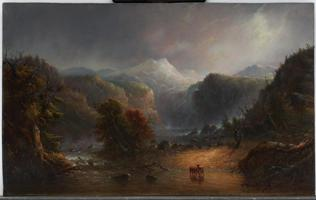

{'l2': 5.442493426308284, 'l2_inv': 0.1552194055668639, 'faiss': 29.620745, 'id': 'f7cad81030f33efd91a9ae5f2ff04255', 'cos': 0.8501382340320421}


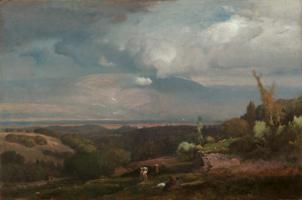

{'l2': 5.442991953585818, 'l2_inv': 0.15520739544668444, 'faiss': 29.626167, 'id': 'a86947f03a9a380b887f0bda21bdcdcf', 'cos': 0.852092500185389}


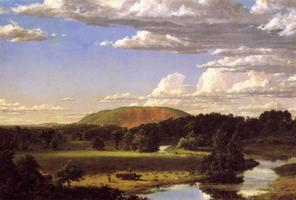

{'l2': 5.444050610725937, 'l2_inv': 0.15518189728918774, 'faiss': 29.637693, 'id': 'ed78466aa1c23166b41c13963ece2de8', 'cos': 0.8542645167556088}


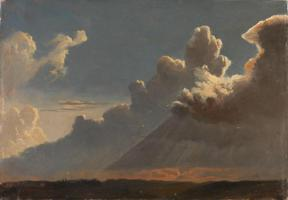

{'l2': 5.445179513811652, 'l2_inv': 0.15515471646011675, 'faiss': 29.649992, 'id': '7fbf0d4f3c373a08b5decad32330aed5', 'cos': 0.8523140817907007}


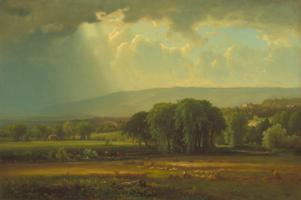

{'l2': 5.44797512601698, 'l2_inv': 0.15508744690485746, 'faiss': 29.680454, 'id': '7de0b1a9ccf6366ba546b73bb5c19476', 'cos': 0.8504161785189215}


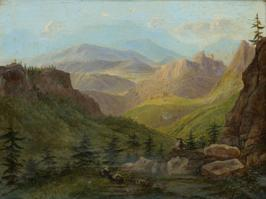

{'l2': 5.450934674839276, 'l2_inv': 0.1550162961501257, 'faiss': 29.712698, 'id': '7497e17c47f83d1d8148e1d105ab8c48', 'cos': 0.8522008083342353}


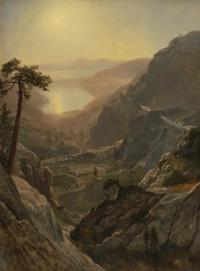

{'l2': 5.4523459212199095, 'l2_inv': 0.15498239124335966, 'faiss': 29.728088, 'id': '08bf197698533d55a3f7a6aa9ef24cdb', 'cos': 0.8580975761948155}


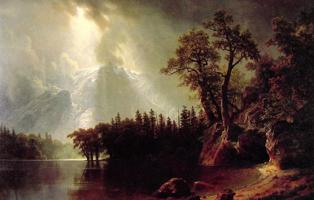

{'l2': 5.457674785969029, 'l2_inv': 0.15485449997772557, 'faiss': 29.786224, 'id': '77579fdaf03f3c88bbf2500c30911ff0', 'cos': 0.8503904414757424}


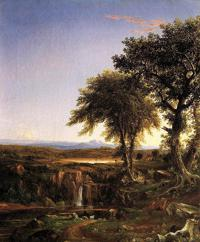

{'l2': 5.4586567920789975, 'l2_inv': 0.15483095513395548, 'faiss': 29.796942, 'id': '6fa79045731337ec9a99b8cc0fa80948', 'cos': 0.8486152351988002}


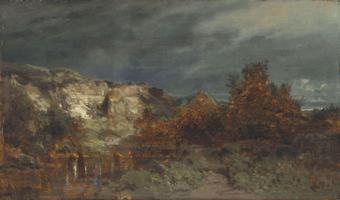

{'l2': 5.462391788159633, 'l2_inv': 0.15474146922385545, 'faiss': 29.837717, 'id': '747591d791d73230a32a9a59ce01f48f', 'cos': 0.8558256434059345}


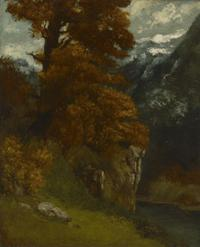

{'l2': 5.466133674460688, 'l2_inv': 0.1546519218972697, 'faiss': 29.878607, 'id': '3f2e9373d2a43ec2a7dd2dc0839d6a6b', 'cos': 0.8505917768940535}


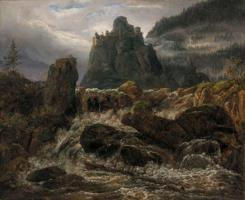

{'l2': 5.467441191889154, 'l2_inv': 0.15462065604154301, 'faiss': 29.892914, 'id': 'cff481713d5530d08ffd5a7970e3cee3', 'cos': 0.8516849195824624}


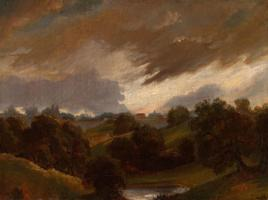

{'l2': 5.47200149523737, 'l2_inv': 0.15451170719535248, 'faiss': 29.942808, 'id': '41cbae43714a3cf5a77d0c6558b53c32', 'cos': 0.8475596345518573}


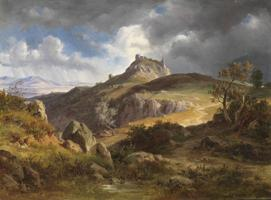

{'l2': 5.472023861937868, 'l2_inv': 0.15451117321755017, 'faiss': 29.943043, 'id': 'be3d7f2ca50f386fbe58fb16d7ad0458', 'cos': 0.8511102892303274}


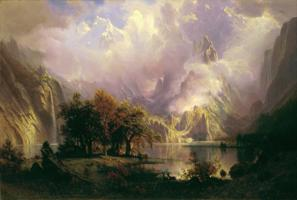

{'l2': 5.472840370301104, 'l2_inv': 0.15449168259860577, 'faiss': 29.951971, 'id': 'f46a0555dfec3656adabc24c371b3227', 'cos': 0.8471802563467947}


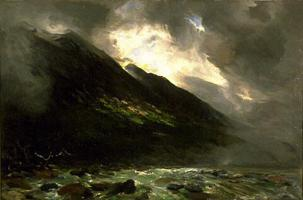

{'l2': 5.476444879021665, 'l2_inv': 0.15440569921920813, 'faiss': 29.991451, 'id': '3b324818e0da38f2a8e62d1acc0a7cb4', 'cos': 0.8478939174986987}


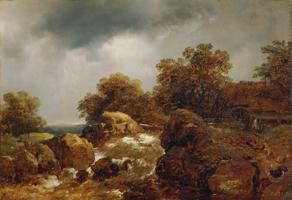

{'l2': 5.482464085479134, 'l2_inv': 0.1542623278453671, 'faiss': 30.057411, 'id': '2f4d4ef5644037f9adcf219d30781f22', 'cos': 0.846157202257874}


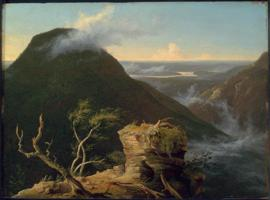

{'l2': 5.494822339298733, 'l2_inv': 0.15396879972362312, 'faiss': 30.19308, 'id': 'd84e7a95a7a23ca2a7d539f88906615a', 'cos': 0.8460789024611431}


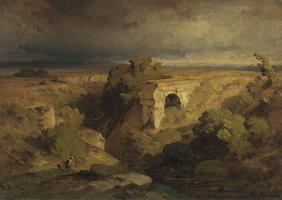

{'l2': 5.496285426795868, 'l2_inv': 0.15393412301054407, 'faiss': 30.209162, 'id': 'c428d5bd5e8535c7afd451306aa82d21', 'cos': 0.8561192975006378}


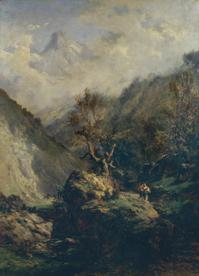

{'l2': 5.499404962199342, 'l2_inv': 0.15386023887048403, 'faiss': 30.243462, 'id': '9ebbeae2e56e3a1f80443ea2f698a18a', 'cos': 0.8460674421989549}


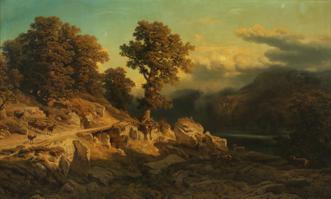

{'l2': 5.501976456606747, 'l2_inv': 0.15379938802821816, 'faiss': 30.271736, 'id': 'd2a3d5f065e64932b4d02bc0a2c64db5', 'cos': 0.8506035692031385}


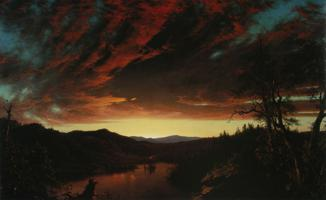

{'l2': 5.502005331625763, 'l2_inv': 0.15379870501428208, 'faiss': 30.272055, 'id': '774048ca885039a4874a021f940d78de', 'cos': 0.8496764544987213}


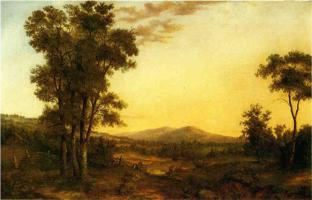

{'l2': 5.5044678254091375, 'l2_inv': 0.1537404791355239, 'faiss': 30.29918, 'id': '8801122cca213432bbc76f6c3e6e2a60', 'cos': 0.846242321178615}


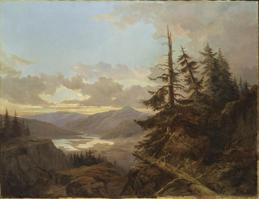

{'l2': 5.505125534952375, 'l2_inv': 0.15372493499578885, 'faiss': 30.306414, 'id': 'af2cd1e2370e35e9bbaf199273f00383', 'cos': 0.8509832425935684}


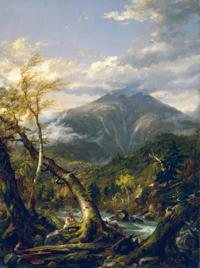

{'l2': 5.507217999200484, 'l2_inv': 0.15367550312942735, 'faiss': 30.329456, 'id': '6271ca2d899e3f65a55b4cbcc47663fa', 'cos': 0.8487786647241858}


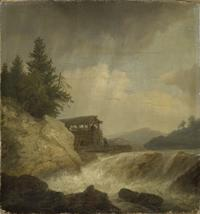

{'l2': 5.510382171973588, 'l2_inv': 0.15360081383622604, 'faiss': 30.364328, 'id': '5340eec351da3f078634815352be7f8a', 'cos': 0.8561997241005358}


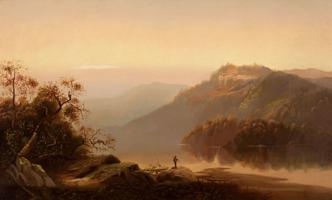

{'l2': 5.518440756079919, 'l2_inv': 0.15341092101930573, 'faiss': 30.453186, 'id': '3ebf276d20923b7292015111ac48bd12', 'cos': 0.8531603730059304}


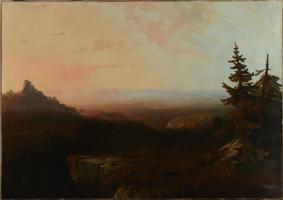

{'l2': 5.520217447352147, 'l2_inv': 0.15336911814284643, 'faiss': 30.472809, 'id': '38fc666ad16a37d08356130ed8f5e082', 'cos': 0.8471229706635767}


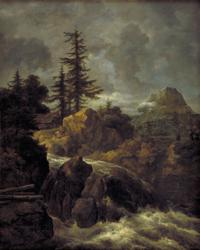

{'l2': 5.523588485533682, 'l2_inv': 0.15328986526626256, 'faiss': 30.510025, 'id': '2122130d65b53ad0b5a3774c6f4a322b', 'cos': 0.8409799965941333}


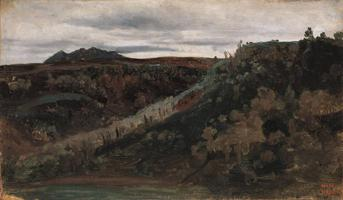

{'l2': 5.525418380062666, 'l2_inv': 0.15324687885995697, 'faiss': 30.530254, 'id': '306ec819ef6d341b90d0346847e81199', 'cos': 0.8551063205705802}


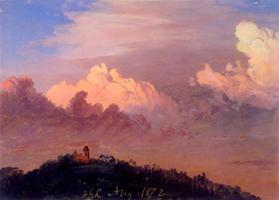

{'l2': 5.526645702562053, 'l2_inv': 0.15321806109491237, 'faiss': 30.543806, 'id': '029d4dda19b93eeb82a47a9dee0577bd', 'cos': 0.8424138415604083}


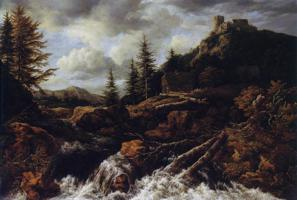

{'l2': 5.528620362946996, 'l2_inv': 0.15317171843464392, 'faiss': 30.565655, 'id': '2f299d0546e33e488f88708f4a489b32', 'cos': 0.8441344181974615}


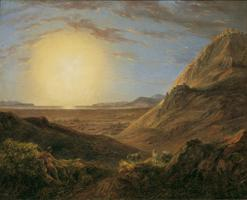

{'l2': 5.528759795276986, 'l2_inv': 0.15316844720239467, 'faiss': 30.567196, 'id': '525f20be86f23ff984e72f608ced7f00', 'cos': 0.8577156286233214}


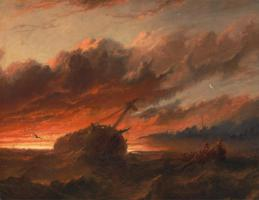

{'l2': 5.5291785048985025, 'l2_inv': 0.15315862466461164, 'faiss': 30.571808, 'id': 'feb15f819a543a9095bd7dd6bb6e59a6', 'cos': 0.8488854268135134}


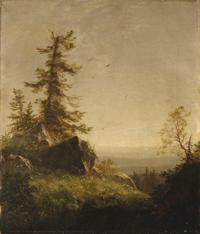

{'l2': 5.529267545212074, 'l2_inv': 0.15315653602421334, 'faiss': 30.572798, 'id': 'f60c13e21dce3ba4a5922d9555e123c8', 'cos': 0.8503228852721665}


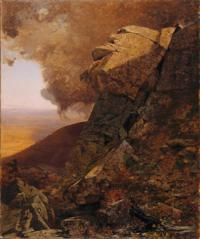

{'l2': 5.529790378371815, 'l2_inv': 0.15314427294821478, 'faiss': 30.57858, 'id': 'e9b149f70dc637c5a36f252cd0d63a73', 'cos': 0.8529487129076716}


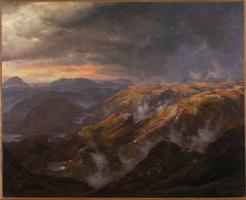

{'l2': 5.5349520894788915, 'l2_inv': 0.1530233100882216, 'faiss': 30.635704, 'id': '857b9645515d318ea9803d35884aca1c', 'cos': 0.8496873371104638}


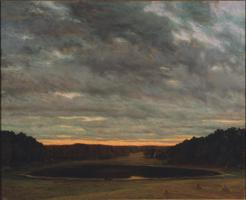

{'l2': 5.53732840822244, 'l2_inv': 0.15296768611811398, 'faiss': 30.66201, 'id': '75814cb398023c99ac9b380b7d899164', 'cos': 0.848974414894785}


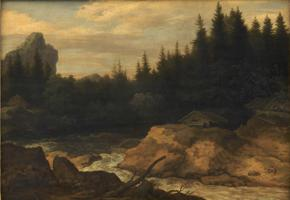

{'l2': 5.538067087824816, 'l2_inv': 0.15295040362345003, 'faiss': 30.670189, 'id': 'f129b20718c4395ba4cab8b0dea175b0', 'cos': 0.8399533428575877}


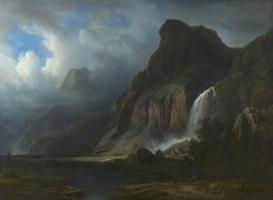

{'l2': 5.538099128591102, 'l2_inv': 0.1529496540710129, 'faiss': 30.67055, 'id': '5f98ea2ec0d530caade769a139f672e1', 'cos': 0.852543694561857}


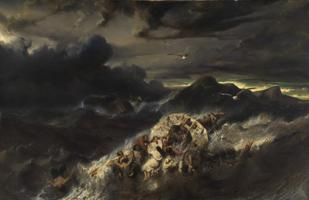

{'l2': 5.540023995101786, 'l2_inv': 0.15290463777334146, 'faiss': 30.69187, 'id': '127cae97f70534bfbb763370dd8c5d5d', 'cos': 0.8476726257909247}


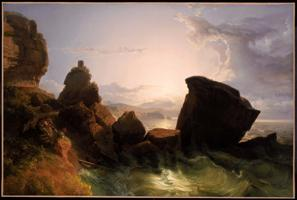

{'l2': 5.544410123024453, 'l2_inv': 0.15280215958376658, 'faiss': 30.740496, 'id': 'fd3827476d863bf781e08158c3eaffc5', 'cos': 0.8435572052882807}


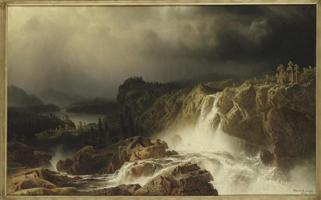

In [46]:
result = d[f"{embedding}.{embedding_ser}"]["index"].search(np.asarray([feature]).astype("float32"), k=1000)
ids = [d[f"{embedding}.{embedding_ser}"]["rev_entries"][x.item()] for x in result[1][0] if x >= 0]

result_list =[]

for i,x in enumerate(ids):
    c = get_feature(x)
    a = np.linalg.norm(np.asarray(feature)-np.asarray(c))
    a_inv  = 1/(np.linalg.norm(np.asarray(feature)-np.asarray(c))+1)
    c = np.dot(np.asarray(feature),np.asarray(c))/(np.linalg.norm(np.asarray(feature))*np.linalg.norm(np.asarray(c))) 
    result_list.append({'l2': a, 'l2_inv':a_inv, 'faiss':result[0][0,i], 'id':x, 'cos':c})
    
result_list =sorted(result_list, key=lambda x: -x['l2_inv'])[:100]

for i,x in enumerate(result_list):
    print(x)
    display(Image(filename=id_to_path(x['id'])))

In [12]:
for x in result:
    d["byol_embedding_feature.byol_embedding"]['rev_entries'][x]

TypeError: unhashable type: 'numpy.ndarray'